In [1]:
import pickle as pkl
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
home = '/home/nina/CopulaGP/'
sys.path.insert(0, home)
import bvcopula
from vine import CVine

trained = []
for i in range(1,6):
    with open(f'/home/nina/CopulaGP/out/AA0D{i}_gV_trained.pkl',"rb") as f:
        trained.append(pkl.load(f))

In [ ]:
# calculate H(Y|X,V)
device = 'cuda:0'

N_points = 100
inputs = torch.linspace(0,1,N_points,device=device).float()

vines, cHs = [],[]

for d in range(5): #day-1

    %time cond_vine = CVine.marginalize(trained[d]['models'][1:],inputs)

    sem_tol = 0.1
    %time cH1 = cond_vine.truncate(1).entropy(sem_tol=sem_tol,mc_size=10000,v=True).cpu().numpy()
    %time cH20 = cond_vine.truncate(19).entropy(sem_tol=sem_tol,mc_size=4000,v=True).cpu().numpy()
    
    vines.append(cond_vine)
    cHs.append([cH1,cH20])

In [ ]:
# help(cond_vine)
# vines.append(cond_vine)
# cHs.append([cH1,cH20])

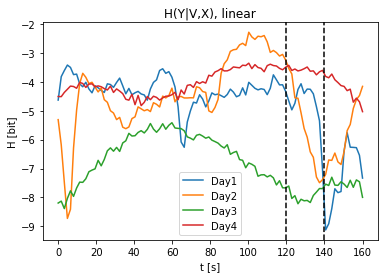

In [117]:
def one_plot(H,c,l,style='solid'):
    plt.plot(inputs.cpu().numpy()*160,H,c=c,label=f"Day{l}",linestyle=style)
for i in range(4):
    one_plot(cHs[i][0],f"C{i}",i+1)
plt.axvline(120,color='k',linestyle='dashed')
plt.axvline(140,color='k',linestyle='dashed')
plt.xlabel('t [s]')
plt.ylabel('H [bit]')
plt.title(f'H(Y|V,X), linear')
plt.legend()

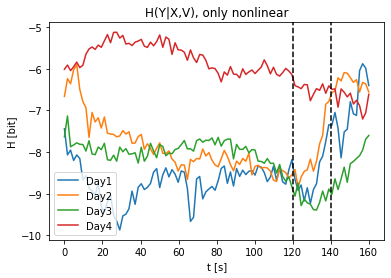

In [118]:
for i in range(4):
    one_plot(cHs[i][1]-cHs[i][0],f"C{i}",i+1)
# for i in range(4):
#     one_plot(cHs[i][0],f"C{i}",i+1,style='dashed')
plt.axvline(120,color='k',linestyle='dashed')
plt.axvline(140,color='k',linestyle='dashed')
plt.xlabel('t [s]')
plt.ylabel('H [bit]')
plt.title(f'H(Y|X,V), only nonlinear')
plt.legend()

In [102]:
# calculate H(Y|X)
device = 'cuda:0'

N_points = 100
inputs = torch.linspace(0,1,N_points,device=device).float()

Hs = []

for d in range(5): #day-1

    %time vine = CVine.marginalize(trained[d]['models'],inputs)

    sem_tol = 0.1
    %time H1 = vine.truncate(1).entropy(sem_tol=sem_tol,mc_size=10000,v=True).cpu().numpy()
    %time H20 = vine.truncate(20).entropy(sem_tol=sem_tol,mc_size=4000,v=True).cpu().numpy()
    
    vines.append(vine)
    Hs.append([H1,H20])

CPU times: user 1.59 s, sys: 3.91 ms, total: 1.6 s
Wall time: 1.59 s
CPU times: user 377 ms, sys: 0 ns, total: 377 ms
Wall time: 376 ms
CPU times: user 2.67 s, sys: 12 ms, total: 2.68 s
Wall time: 2.67 s
CPU times: user 1.61 s, sys: 11 µs, total: 1.61 s
Wall time: 1.61 s
CPU times: user 317 ms, sys: 5 µs, total: 317 ms
Wall time: 316 ms
CPU times: user 2.14 s, sys: 2 µs, total: 2.14 s
Wall time: 2.14 s
CPU times: user 1.62 s, sys: 4.03 ms, total: 1.62 s
Wall time: 1.62 s
CPU times: user 352 ms, sys: 10 µs, total: 353 ms
Wall time: 352 ms
CPU times: user 2.49 s, sys: 3 µs, total: 2.49 s
Wall time: 2.49 s
CPU times: user 1.6 s, sys: 3 µs, total: 1.6 s
Wall time: 1.6 s
CPU times: user 351 ms, sys: 7.95 ms, total: 359 ms
Wall time: 358 ms
CPU times: user 2.15 s, sys: 3.99 ms, total: 2.16 s
Wall time: 2.15 s
CPU times: user 1.57 s, sys: 8 ms, total: 1.58 s
Wall time: 1.58 s
CPU times: user 160 ms, sys: 1e+03 ns, total: 160 ms
Wall time: 160 ms
CPU times: user 1.71 s, sys: 4.01 ms, total: 1.

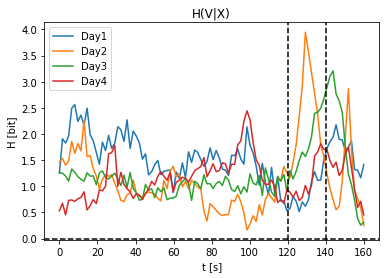

In [104]:

for i in range(4):
    one_plot(cHs[i][1]-Hs[i][1],f"C{i}",i+1)
plt.axvline(120,color='k',linestyle='dashed')
plt.axvline(140,color='k',linestyle='dashed')
plt.axhline(0,color='k',linestyle='dashed')
plt.xlabel('t [s]')
plt.ylabel('H [bit]')
plt.title(f'H(V|X)')
plt.legend()

In [95]:
import MI

HVgX = []
for d in range(5):
    HVgX.append(MI.BI_KSG(trained[d]['Y'][:,0].reshape(-1,1),trained[d]['X'].reshape(-1,1)))

/home/nina/CopulaGP/MI/ksg.py:41: RuntimeWarning: divide by zero encountered in log
  ans_xy += (dx+dy)*np.log(knn_dis[i])/N
/home/nina/CopulaGP/MI/ksg.py:42: RuntimeWarning: divide by zero encountered in log
  ans_x += -np.log(len(tree_x.query_ball_point(x[i],knn_dis[i]+1e-15,p=q))-1)/N+dx*np.log(knn_dis[i])/N
/home/nina/CopulaGP/MI/ksg.py:43: RuntimeWarning: divide by zero encountered in log
  ans_y += -np.log(len(tree_y.query_ball_point(y[i],knn_dis[i]+1e-15,p=q))-1)/N+dy*np.log(knn_dis[i])/N
/home/nina/CopulaGP/MI/ksg.py:44: RuntimeWarning: invalid value encountered in double_scalars
  return (ans_x+ans_y-ans_xy)/np.log(2), (ans_xy-ans_x)/np.log(2)


In [2]:
from tqdm import tqdm

with open(f'/home/nina/CopulaGP/out/AA0D1_sub24-38_gV_trained.pkl',"rb") as f:
    trained = pkl.load(f)
    
device = 'cuda:0'
N_points = 100
sem_tol = 0.1
inputs = torch.linspace(0,1,N_points,device=device).float()


entropies = np.zeros([4,10,N_points])

# for i in tqdm(range(10)):
#     vine = CVine.marginalize(trained['models'],inputs)
#     entropies[0,i] = vine.truncate(1).entropy(sem_tol=sem_tol,mc_size=10000,v=True).cpu().numpy()
#     entropies[1,i] = vine.truncate(19).entropy(sem_tol=sem_tol,mc_size=4000,v=True).cpu().numpy()    
#     cond_vine = CVine.marginalize(trained['models'][1:],inputs)
#     entropies[2,i] = cond_vine.truncate(1).entropy(sem_tol=sem_tol,mc_size=10000,v=True).cpu().numpy()
#     entropies[3,i] = cond_vine.truncate(19).entropy(sem_tol=sem_tol,mc_size=4000,v=True).cpu().numpy()

In [3]:
np.argsort(trained['waics'][0])
# trained['X']

array([ 6, 34, 27, 56,  2, 35, 17,  4,  5, 13, 11, 24, 32, 19, 31, 14, 15,
        7,  9,  8, 25, 54, 12, 49,  0, 29,  1,  3, 45, 16, 10, 63, 39, 53,
       47, 51, 21, 33, 26, 70, 22, 86, 30, 40, 44, 48, 55, 43, 23, 18, 41,
       62, 37, 50, 67, 75, 38, 71, 69, 84, 82, 52, 66, 28, 65, 64, 20, 68,
       57, 88, 42, 61, 77, 72, 73, 90, 36, 76, 83, 59, 81, 87, 80, 91, 78,
       58, 93, 85, 89, 74, 92, 79, 46, 60])

In [9]:
# trained['Y'][35]
# vine = CVine.marginalize(trained['models'],inputs)
vine.effective_dims

25.80697580112788

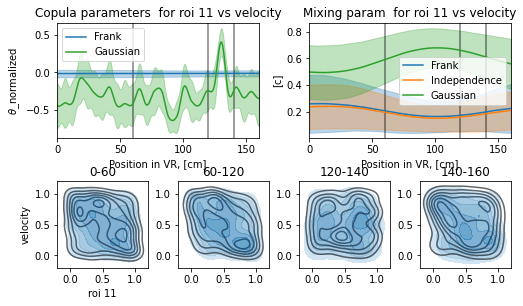

In [204]:
from utils import Plot_Fit

n=33
Plot_Fit(trained['models'][0][n-1].model_init(device), trained['X'], trained['Y'][...,[n,0]], 
         trained['Y_labels'][n], trained['Y_labels'][0], device, interval_ends=np.array([0,60,120,140,160]), order=None);


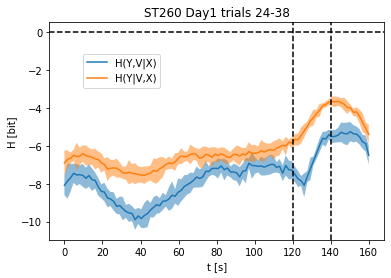

In [163]:
def one_plot(ar,c,l):
    plt.plot(inputs.cpu().numpy()*160,ar.mean(0),c=c,label=l)
    plt.fill_between(inputs.cpu().numpy()*160,ar.mean(0)-2*ar.std(0),ar.mean(0)+2*ar.std(0),alpha=0.5)
one_plot(entropies[1],f"C0",'H(Y,V|X)')
one_plot(entropies[3],f"C1",'H(Y|V,X)')
plt.axvline(120,color='k',linestyle='dashed')
plt.axvline(140,color='k',linestyle='dashed')
plt.axhline(0,color='k',linestyle='dashed')
plt.xlabel('t [s]')
plt.ylabel('H [bit]')
plt.title(f'ST260 Day1 trials 24-38')
plt.legend(loc=(0.1,0.7))

In [153]:
# #make properly ordered hybrids
# [trained[0]['models'][0]]+trained[1]['models'][1:]
trained[0]['order']

KeyError: 0

In [3]:
d0, d1 = 1,2
Train = np.arange(180)[trained[d0]['order']]
Test  = np.arange(180)[trained[d1]['order']]
re_order = np.argsort(trained[d1]['order'])[trained[d0]['order']]
np.all(Test[re_order]==Train)

True

In [4]:
re_order[1:]-1

array([  0,   7,   1,   9,  20,  99,  15,  17,  72,   8,  14,  22,  16,
        34,  42,  67,  64,  37,   5,  36,  21,  11,   6,  49,  19,  35,
        51,  18,  70,   3,  61,  75,  85,  57,  48,  62,  10,  28,  60,
        54,  68,  41,  44,  84,  52,  71,  53,  77,  94,  39,  93,  29,
        24,  27,  47,  40,  65,  86,  58,  43,  78,  73,  56,  59,  13,
        33,  23,  80,  25,  81,  88,  46,   2,  82,  12,  30,  31,  26,
        90,  89,  45,  32,  83,  91,  79,  76,  66,  87,  55,  63,  38,
       100,  50,  95,  69,  92,  74,  98,   4,  96, 101,  97, 102])

In [15]:
resorted_tree0 = [trained[d1]['models'][0][i-1] for i in re_order[1:]]
chimera = [resorted_tree0] + trained[d0]['models'][1:]

In [6]:
device = 'cuda:0'

N_points = 100
subset = torch.randperm(trained[d0]['X'].size)[:N_points]
train_x = trained[d0]['X'][subset]
train_y = trained[d0]['Y'][subset]

# inputs = torch.linspace(0,1,100, device=device).float()
inputs = torch.tensor(train_x,device=device).float()

%time joint_vine = CVine.marginalize([trained[d0]['models'][0]],inputs)
%time chimera_vine = CVine.marginalize([chimera[0]],inputs)
%time test_vine = CVine.marginalize([trained[d1]['models'][0]],inputs)
# with open(f'/home/nina/CopulaGP/out/Thy171_sp_C{C}_A{A}_cpu_vine.pkl',"wb") as f:
#     pkl.dump(joint_vine,f)

CPU times: user 764 ms, sys: 0 ns, total: 764 ms
Wall time: 763 ms
CPU times: user 765 ms, sys: 0 ns, total: 765 ms
Wall time: 764 ms
CPU times: user 753 ms, sys: 0 ns, total: 753 ms
Wall time: 752 ms


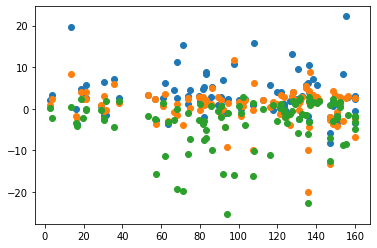

In [7]:
ll    =   joint_vine.log_prob(torch.tensor(train_y,device=device).float())
ll_ch = chimera_vine.log_prob(torch.tensor(train_y,device=device).float())
ll_test = test_vine.log_prob(torch.tensor(train_y.T[re_order].T,device=device).float())
# trained[0].keys()

plt.scatter(train_x*160,ll.cpu().numpy())
plt.scatter(train_x*160,ll_ch.cpu().numpy())
plt.scatter(train_x*160,ll_test.cpu().numpy())

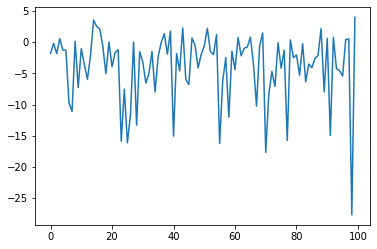

In [8]:
plt.plot((ll_test-ll_ch).cpu().numpy())

In [9]:
subset = torch.randperm(trained[d1]['X'].size)[:N_points]
test_x = trained[d1]['X'][subset]
test_y = trained[d1]['Y'][subset]

# inputs = torch.linspace(0,1,100, device=device).float()
inputs = torch.tensor(test_x,device=device).float()

%time joint_vine = CVine.marginalize(trained[d0]['models'],inputs)
%time chimera_vine = CVine.marginalize(chimera,inputs)
%time test_vine = CVine.marginalize(trained[d1]['models'],inputs)

CPU times: user 11.6 s, sys: 70.8 ms, total: 11.7 s
Wall time: 11.7 s
CPU times: user 11.3 s, sys: 24.6 ms, total: 11.3 s
Wall time: 11.3 s
CPU times: user 11.5 s, sys: 55.5 ms, total: 11.5 s
Wall time: 11.5 s


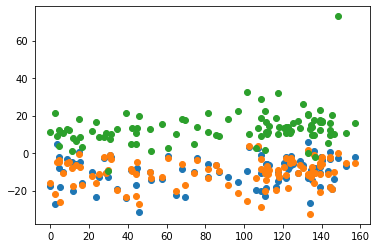

In [10]:
re_order_back = np.argsort(trained[d0]['order'])[trained[d1]['order']]

llb    =   joint_vine.log_prob(torch.tensor(test_y.T[re_order_back].T,device=device).float())
llb_ch = chimera_vine.log_prob(torch.tensor(test_y.T[re_order_back].T,device=device).float())
llb_test = test_vine.log_prob(torch.tensor(test_y,device=device).float())

plt.scatter(test_x*160,llb.cpu().numpy())
plt.scatter(test_x*160,llb_ch.cpu().numpy())
plt.scatter(test_x*160,llb_test.cpu().numpy())

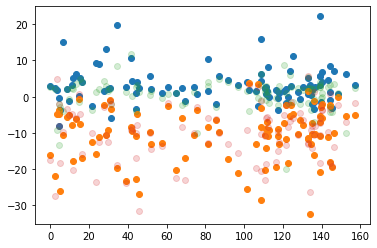

In [11]:
plt.scatter(test_x*160,ll.cpu().numpy())
plt.scatter(test_x*160,llb_ch.cpu().numpy())
plt.scatter(test_x*160,ll_ch.cpu().numpy(),alpha=0.2)
plt.scatter(test_x*160,llb.cpu().numpy(),alpha=0.2)

In [12]:
sem_tol = 0.1
%time H1 = joint_vine.truncate(1).entropy(sem_tol=sem_tol,mc_size=10000,v=True).cpu().numpy()
%time H20 = joint_vine.truncate(19).entropy(sem_tol=sem_tol,mc_size=4000,v=True).cpu().numpy()

CPU times: user 5.29 s, sys: 10.7 ms, total: 5.31 s
Wall time: 5.3 s
CPU times: user 1min 4s, sys: 57 ms, total: 1min 4s
Wall time: 1min 4s


Text(0.5, 1.0, 'Unconditional ')

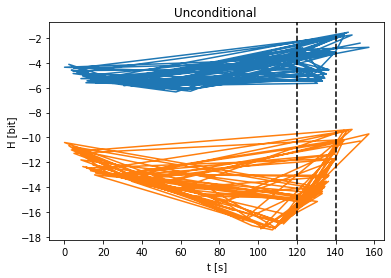

In [13]:
# %time H = joint_vine.entropy(sem_tol=sem_tol,mc_size=4000,v=True).cpu().numpy()

X = inputs.cpu().numpy()

def one_plot(H,c):
#     y = np.convolve(H,mask,'same')
#     plt.axvline(4*X[np.argmin(y)],c=c)
#     low_points = np.where(np.sort(y)[13]>y)[0] # ~10%
#     plt.axvspan(4*X[low_points[0]],4*X[low_points[-1]], alpha=0.2, facecolor=c)
#     plt.axvline(4*X[low_points[0]],c=c,alpha=0.5)
#     plt.axvline(4*X[low_points[-1]],c=c,alpha=0.5)
    plt.plot(X*160,H,c=c)
one_plot(H1,"C0")
one_plot(H20,"C1")
# one_plot(H,"C2")
plt.axvline(120,color='k',linestyle='dashed')
plt.axvline(140,color='k',linestyle='dashed')
plt.xlabel('t [s]')
plt.ylabel('H [bit]')
plt.title(f'Unconditional ')
# plt.ylim(-45,-5)
# plt.scatter(X.cpu().numpy(),HC)

Text(0.5, 1.0, 'Unconditional ')

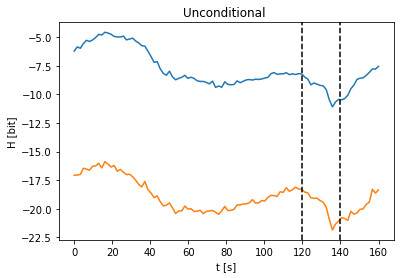

In [31]:
one_plot(H1,"C0")
one_plot(H20,"C1")
# one_plot(H,"C2")
plt.axvline(120,color='k',linestyle='dashed')
plt.axvline(140,color='k',linestyle='dashed')
plt.xlabel('t [s]')
plt.ylabel('H [bit]')
plt.title(f'Unconditional ')
# plt.ylim(-45,-5)
# plt.scatter(X.cpu().numpy(),HC)